In [ ]:
import sys
sys.path.append("..")

from plotting_tools import *

In [9]:
def load_runtime_data(timing_folder, x_values):
    # df with one column per x value
    total_df = pd.DataFrame()
    for x in x_values:
        df = pd.read_csv(f"{timing_folder}/{x}_timings.txt", sep=',')
        df['total'] = df.init + df.simulation + df.output
        total_df[x] = df.total.iloc[:]
    return total_df

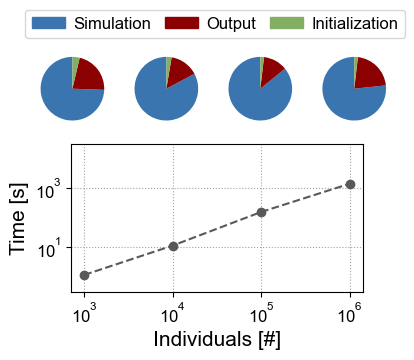

In [13]:
timing_result_folder = 'V:/bick_ju/times_agents'
x_values = ["1000", "10000", "100000", "1000000"]
timings = load_runtime_data(timing_result_folder, x_values)
means = timings.mean()

fig = plt.figure(figsize=(4, 3.5))       
# Line plot in bottom half
ax_line = fig.add_subplot(2, 1, 2)
# Log-scaled line plot
x_vals = timings.columns.astype(int)
ax_line.plot(x_vals, means, marker='o', color=colors['Dark grey'], linestyle='dashed', markerfacecolor=colors['Dark grey'])
ax_line.set_xlabel('Individuals [#]')
ax_line.set_ylabel('Time [s]')
ax_line.set_xticks([int(n) for n in x_values])
ax_line.set_yscale("log")
ax_line.set_ylim(10**(-0.5), 10**(4.5))
ax_line.set_xscale("log")
ax_line.minorticks_off()
ax_line.grid(color = colors['Medium grey'], linestyle='dotted')

# Get x-tick positions in figure coordinates
fig.canvas.draw()
x_ticks_data = [int(n) for n in x_values]
x_ticks_disp = ax_line.transData.transform(np.column_stack([x_ticks_data, np.zeros_like(x_ticks_data)]))
x_ticks_fig = fig.transFigure.inverted().transform(x_ticks_disp)[:, 0]

ordered_keys = ['simulation', 'output', 'init']
pie_colors = [colors['Blue'], colors['Dark red'], colors['Green']]
keys_to_legend = {'simulation': "Simulation", 'output': "Output", 'init': "Initialization"}
legend_dict = {keys_to_legend[ordered_keys[i]]: pie_colors[i] for i in range(len(ordered_keys))}

pie_size = 0.2
# Plot pies aligned to x-tick positions
for i, (x, x_fig) in enumerate(zip(x_values, x_ticks_fig)):
    df = pd.read_csv(f"{timing_result_folder}/{x}_timings.txt", sep=',')
    df = df.drop(['Sim_num'], axis=1)
    col_means = df[ordered_keys].mean()

    pie_ax = fig.add_axes([x_fig - pie_size/3, 0.65, pie_size, pie_size])
    #pie_ax = fig.add_axes([x_fig - pie_size/2, 0.65, pie_size, pie_size])
    pie_ax.pie(col_means, colors=[legend_dict[keys_to_legend[k]] for k in ordered_keys], startangle=90)
    pie_ax.axis('equal')
    pie_ax.set_xticks([])
    pie_ax.set_yticks([])

# Legend
patchList = [patches.Patch(color=color, label=label) for label, color in legend_dict.items()]
legend = fig.legend(handles=patchList, loc='upper center', bbox_to_anchor=(0.55, 1.) , ncol=3, columnspacing=0.8, handletextpad=0.5)
# Adjust layout
plt.subplots_adjust(bottom=0.17, top=1.1, right=0.92, left=0.19)

# Save
fig.savefig(f'runtime_scaling.png', dpi=dpi)
plt.show()